In [1]:
import numpy as np
import pandas as pd
import matplotlib as plt

In [2]:
states_data = pd.read_csv("states-daily.csv")

In [3]:
oregon_data = states_data.loc[states_data['state']=='OR']
oregon_data.head(5)

,date,state,positive,negative,pending,hospitalized,death,total,hash,dateChecked,totalTestResults,fips,deathIncrease,hospitalizedIncrease,negativeIncrease,positiveIncrease,totalTestResultsIncrease
40,20200327,OR,414.0,8510.0,NaN,102.0,12.0,8924,0b7d00e5ee9f4f5caa2694a35e0b787a9a3d6d76,2020-03-27T20:00:00Z,8924,41,1.0,12.0,1557.0,87.0,1644.0
96,20200326,OR,327.0,6953.0,NaN,90.0,11.0,7280,f4fb4c00a275aa00d796613554a351d733deba05,2020-03-26T20:00:00Z,7280,41,3.0,29.0,2603.0,118.0,2721.0
152,20200325,OR,209.0,4350.0,NaN,61.0,8.0,4559,30d803695e96c177174fb2f2615ea8f6f73c6c95,2020-03-25T20:00:00Z,4559,41,0.0,0.0,0.0,0.0,0.0
208,20200324,OR,209.0,4350.0,NaN,61.0,8.0,4559,2050b71c9fd03edf470f93ef7a1f642bfe287652,2020-03-24T20:00:00Z,4559,41,3.0,5.0,701.0,18.0,719.0
264,20200323,OR,191.0,3649.0,NaN,56.0,5.0,3840,01c85118adc84df47a5b701e7eb645d4eaf67d3d,2020-03-23T20:00:00Z,3840,41,1.0,13.0,785.0,30.0,815.0


In [4]:
oregon_certain_columns = oregon_data[['date', 'positive', 'negative', 'death', 'total', 'hospitalized']].fillna(1).sort_values('total')
#oregon_certain_columns = oregon_certain_columns


In [5]:
oregon_certain_columns['date2'] = oregon_certain_columns['date'].astype(str)
oregon_certain_columns['year'] = oregon_certain_columns['date2'].str[0:4]
oregon_certain_columns['month'] = oregon_certain_columns['date2'].str[4:6]
oregon_certain_columns['day'] = oregon_certain_columns['date2'].str[6:8]
oregon_certain_columns.head(5)

,date,positive,negative,death,total,hospitalized,date2,year,month,day
1200,20200304,3.0,29.0,1.0,50,1.0,20200304,2020,03,04
1184,20200305,3.0,45.0,1.0,61,1.0,20200305,2020,03,05
1157,20200306,3.0,64.0,1.0,95,1.0,20200306,2020,03,06
1117,20200307,7.0,77.0,1.0,124,1.0,20200307,2020,03,07
1066,20200308,14.0,100.0,1.0,167,1.0,20200308,2020,03,08


In [6]:
oregon_certain_columns = oregon_certain_columns.drop(columns=['date','date2'])
oregon_certain_columns.head(5)

,positive,negative,death,total,hospitalized,year,month,day
1200,3.0,29.0,1.0,50,1.0,2020,03,04
1184,3.0,45.0,1.0,61,1.0,2020,03,05
1157,3.0,64.0,1.0,95,1.0,2020,03,06
1117,7.0,77.0,1.0,124,1.0,2020,03,07
1066,14.0,100.0,1.0,167,1.0,2020,03,08


In [7]:
oregon_certain_columns[['negative','death','positive', 'hospitalized','total']] = oregon_certain_columns[['negative','death','positive','hospitalized','total']].pct_change()
oregon_certain_columns.head(5)

,positive,negative,death,total,hospitalized,year,month,day
1200,NaN,NaN,NaN,NaN,NaN,2020,03,04
1184,0.000000,0.551724,0.0,0.220000,0.0,2020,03,05
1157,0.000000,0.422222,0.0,0.557377,0.0,2020,03,06
1117,1.333333,0.203125,0.0,0.305263,0.0,2020,03,07
1066,1.000000,0.298701,0.0,0.346774,0.0,2020,03,08


In [8]:
oregon_certain_columns = oregon_certain_columns.fillna(1)
def multiply(x, y):
    try:
        return pd.to_numeric(x) * y
    except:
        return x

oregon_certain_columns[['negative','death','positive','hospitalized','total']] = oregon_certain_columns[['negative','death','positive','hospitalized','total']].applymap(lambda x: multiply(x, 100))
oregon_certain_columns


,positive,negative,death,total,hospitalized,year,month,day
1200,100.000000,100.000000,100.000000,100.000000,100.000000,2020,03,04
1184,0.000000,55.172414,0.000000,22.000000,0.000000,2020,03,05
1157,0.000000,42.222222,0.000000,55.737705,0.000000,2020,03,06
1117,133.333333,20.312500,0.000000,30.526316,0.000000,2020,03,07
1066,100.000000,29.870130,0.000000,34.677419,0.000000,2020,03,08
1015,0.000000,65.000000,0.000000,38.323353,0.000000,2020,03,09
964,7.142857,29.090909,0.000000,27.705628,0.000000,2020,03,10
913,26.666667,34.272300,0.000000,24.406780,0.000000,2020,03,11
862,0.000000,0.000000,0.000000,0.000000,0.000000,2020,03,12
811,57.894737,17.832168,0.000000,42.779292,0.000000,2020,03,13


In [9]:
oregon_data_first_last =  oregon_data[['date', 'positive', 'negative', 'death', 'total', 'hospitalized']].fillna(0).sort_values('total')
oregon_data_first_last['date2'] = oregon_data_first_last['date'].astype(str)
oregon_data_first_last['year'] = oregon_data_first_last['date2'].str[0:4]
oregon_data_first_last['month'] = oregon_data_first_last['date2'].str[4:6]
oregon_data_first_last['day'] = oregon_data_first_last['date2'].str[6:8]
oregon_certain_columns.head(5)

,positive,negative,death,total,hospitalized,year,month,day
1200,100.000000,100.000000,100.0,100.000000,100.0,2020,03,04
1184,0.000000,55.172414,0.0,22.000000,0.0,2020,03,05
1157,0.000000,42.222222,0.0,55.737705,0.0,2020,03,06
1117,133.333333,20.312500,0.0,30.526316,0.0,2020,03,07
1066,100.000000,29.870130,0.0,34.677419,0.0,2020,03,08


In [10]:
oregon_data_first_last = oregon_data_first_last.drop(columns=['date','date2'])
oregon_data_first_last_test = oregon_data_first_last.iloc[[-7, -1]]
oregon_data_first_last = oregon_data_first_last_test


In [11]:
oregon_data_first_last[['negative','death','positive', 'hospitalized','total']] = oregon_data_first_last[['negative','death','positive','hospitalized','total']].pct_change()


In [12]:
oregon_data_first_last[['negative','death','positive','total']] = oregon_data_first_last[['negative','death','positive','total']].applymap(lambda y: multiply(y, 100))
oregon_data_first_last

,positive,negative,death,total,hospitalized,year,month,day
376,NaN,NaN,NaN,NaN,NaN,2020,03,21
40,263.157895,324.862706,300.0,249.960784,inf,2020,03,27


In [13]:
print("today's growth rate in total tests in Oregon: ", oregon_certain_columns.at[40,'total'])
print("today's growth rate in positive tests in Oregon: ", oregon_certain_columns.at[40,'positive'])
print("today's growth rate in negative tests in Oregon: ", oregon_certain_columns.at[40,'negative'])
print("today's growth rate in deaths in Oregon: ", oregon_certain_columns.at[40,'death'])
print("today's growth rate in hospitalized in Oregon: ", oregon_certain_columns.at[40,'hospitalized'])

today's growth rate in total tests in Oregon:  22.58241758241759
today's growth rate in positive tests in Oregon:  26.60550458715596
today's growth rate in negative tests in Oregon:  22.393211563353944
today's growth rate in deaths in Oregon:  9.090909090909083
today's growth rate in hospitalized in Oregon:  13.33333333333333


In [14]:
print("7 days's growth rate in total tests in Oregon: ", oregon_data_first_last.at[40,'total'])
print("7 days's growth rate in positive tests in Oregon: ", oregon_data_first_last.at[40,'positive'])
print("7 days's growth rate in negative tests in Oregon: ", oregon_data_first_last.at[40,'negative'])
print("7 days's growth rate in deaths in Oregon: ", oregon_data_first_last.at[40,'death'])
print("7 days's growth rate in hospitalized in Oregon: ", oregon_data.at[40,'hospitalized'])

7 days's growth rate in total tests in Oregon:  249.96078431372547
7 days's growth rate in positive tests in Oregon:  263.15789473684214
7 days's growth rate in negative tests in Oregon:  324.86270594108834
7 days's growth rate in deaths in Oregon:  300.0
7 days's growth rate in hospitalized in Oregon:  102.0


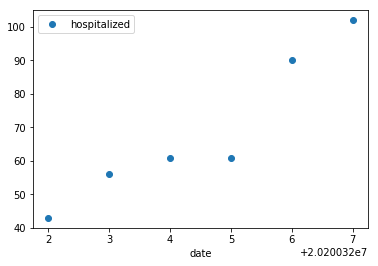

In [16]:
oregon_data.plot(x='date', y='hospitalized', style='o')
